# Projeto 1 - Ciência dos Dados

Nome: Rodrigo de Lima Azeredo

Nome: Ykaro de Sousa Andrade

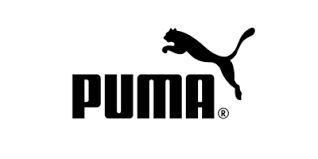

___
Carregando algumas bibliotecas:

In [266]:
#importando bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import display
pd.options.display.max_rows = 13
import emoji
import re

In [267]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Rodrigo Lima\Documents\Cdados\Projeto\projet1cdados


In [268]:
# definindo função de limpeza dos caracteres dos tweets e espaçando os emajis e palavras corretamente.

def cleanup(text):
    #import string
    punctuation = '[!-.:?;\n)(*$#@''""]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    text_subbed = emoji.get_emoji_regexp().split(text_subbed) #emoji
    return ' '.join(text_subbed)

Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [269]:
filename = 'puma.xlsx'

In [270]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Irrelevante 0 / Relevante 1
0,o neymar inovou a puma https://t.co/qtcuvd1svj,1
1,"a @puma tá deitando nas chuteiras do neymar, m...",1
2,fico assim no da puma affss https://t.co/1ygyh...,0
3,"@g_estrella__ puma tá aí , mas três listra tá ...",1
4,@0ketlyn_s eu acho que um puma ^^,0


In [271]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Irrelevante 0 / Relevante 1
0,@0chavex0 @ornate_puma vdd to resfriado,0
1,📽 neymar e puma 👀❤!!\ntemos novidades vindo aí...,1
2,@brgmsch mas a puma nem patrocina a aston,0
3,📽 puma neymar jr creativity a inovadora chute...,1
4,"a puma tá a evoluir muito, quem me dera que o ...",1


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

Para nosso projeto escolhemos a marca de roupas Puma. A partir disso definimos como premissa que os tweets relevantes seriam aqueles que exaltavam a marca em seus comentários, em contra partida os tweets irrelevantes seriam todos os outros, ou seja os que não tinham relação direta com a marca e/ou falavam mal da Puma.

###
Para nossa análise, escolhemos a marca Puma, onde nessa análise foi pego como tweets relevantes, todos aqueles que enaltecia a marca, tais twitts como: Falando o quanto a marca é boa e o quanto a mesma está crescendo no mercado.
E qualificou-se como irrelevante os  tweets que rebaixava a marca ou os que realmente não tinha haver com a marca.


___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [272]:
# Todos os tweets: Treinamentos
dados = pd.read_excel('puma.xlsx')
#dados

In [273]:
# Separando apenas a planilha de Treinamentos.
t_treinamento = dados.loc[:, 'Treinamento']
#t_treinamento

In [274]:
# Limpando os tweets de treinamento usando a função que definimos como cleanup.
lista_limpa = []
for index, argumento in enumerate (t_treinamento):
    #print(f'posição {index} tweeter: {argumento}')
    limpa = cleanup(argumento.lower())
    lista_limpa.append(limpa)
    
#print(lista_limpa)

In [275]:
# Criando um novo data frame com os tweets de treinamentos limpos
dados['Limpo'] = lista_limpa
#dados

In [276]:
# Filtrando apenas os tweets relevantes e os adicionando em uma nova variável
relevante = dados.loc[dados['Irrelevante 0 / Relevante 1'] == 1, 'Limpo']
#relevante

In [314]:
# 1° for: Separar os tweets relevantes em palavras relevantes dando um split em cada tweet.
p_relevantes = [] 
for c,conteudo in enumerate (relevante):
    p_relevantes.append(conteudo.split())
    
#print(p_relevantes)


In [317]:
# Definindo todas as palvras revelantes em um conjunto
todas_palavras_relevantes=[]
for index, conteudo in enumerate(p_relevantes):
    cont=0
    while cont < len(p_relevantes[index]):
        novo= conteudo[cont]
        todas_palavras_relevantes.append(novo)
        cont+=1
#print(todas_palavras_relevantes)

In [318]:
# Informando o total de palavras dos tweets relevantes
print(f' O total de Palavras relevantes é {len(todas_palavras_relevantes)}')

 O total de Palavras relevantes é 1730


In [321]:
# Fazendo uma nova limpeza, retirando todos os https.
for index, conteudo in enumerate(todas_palavras_relevantes):
    #print(f'{index}: {conteudo}')
    cont = 0
    while cont < len(todas_palavras_relevantes[index]):
        #print(conteudo[cont])
        if conteudo[cont:5] == 'https':
            #print(f' palvra: {lista[index]} na posição {index}')
            lista_de_links.append(todas_palavras_relevantes[index])
        cont+=1

lista_nova_r = []
cont2 = 0
while cont2 < len(todas_palavras_relevantes):
    if todas_palavras_relevantes[cont2] not in lista_de_links:
        lista_nova_r.append(todas_palavras_relevantes[cont2])
    cont2+=1

# Atualização da variável todas_palavras_relevantes sem os https:

todas_palavras_relevantes= lista_nova_r

In [322]:
print(f' O total de Palavras relevantes sem os "htpps" é {len(todas_palavras_relevantes)}')

 O total de Palavras relevantes sem os "htpps" é 1691


In [308]:
# Guardando as palavras como um pd.Series
serie_relevante = pd.Series(todas_palavras_relevantes)

# Frequencia absoluta de palavras relevantes
tabela_relevante = serie_relevante.value_counts()
#tabela_relevante

<div id="Fazendo o mesmo para as palavras irrelevantes"></div>

### Fazendo o mesmo para as palavras irrelevantes



In [283]:
# Filtrando apenas os tweets irrelevantes e os adicionando em uma nova variável
irrelevante = dados.loc[dados['Irrelevante 0 / Relevante 1'] == 0, 'Limpo']
#irrelevante

In [284]:
# 1° for: Separar os tweets relevantes em palavras irrelevantes dando um split em cada tweet.
p_irrelevantes = []
for index, conteudo in enumerate (irrelevante):
    p_irrelevantes.append(conteudo.split())
    
# print(p_irrelevantes)


In [309]:
# Definindo todas as palvras irrevelantes em um conjunto
todas_palavras_irrelevantes=[]
for index, conteudo in enumerate(p_irrelevantes):
    cont=0
    while cont < len(p_irrelevantes[index]):
        novo= conteudo[cont]
        todas_palavras_irrelevantes.append(novo)
        cont+=1
#print(todas_palavras_irrelevantes)

In [310]:
# Informando o total de palavras dos tweets relevantes
print(f' O total de Palavras irrelevantes é {len(todas_palavras_irrelevantes)}')

 O total de Palavras irrelevantes é 3115


In [323]:
lista_de_links= []
for index, conteudo in enumerate(todas_palavras_irrelevantes):
    #print(f'{index}: {conteudo}')
    cont = 0
    while cont < len(todas_palavras_irrelevantes[index]):
        #print(conteudo[cont])
        if conteudo[cont:5] == 'https':
            #print(f' palvra: {lista[index]} na posição {index}')
            lista_de_links.append(todas_palavras_irrelevantes[index])
        cont+=1

lista_nova_irr = []
cont2 = 0
while cont2 < len(todas_palavras_irrelevantes):
    if todas_palavras_irrelevantes[cont2] not in lista_de_links:
        lista_nova_irr.append(todas_palavras_irrelevantes[cont2])
    cont2+=1

# Atualização da variável todas_palavras_relevantes sem os https:

todas_palavras_irrelevantes= lista_nova_irr


In [288]:
print(f' O total de Palavras irrelevantes sem os "htpps": {len(todas_palavras_irrelevantes)}')

 O total de Palavras irrelevantes sem os "htpps": 3067


In [289]:
# Guardando as palavras irrelevantes como um pd.Series
serie_irrelevante = pd.Series(todas_palavras_irrelevantes)

# Frequencia absoluta de palavras relevantes
tabela_irrelevante = serie_irrelevante.value_counts()
#tabela_irrelevante

### Todas as palavras

In [329]:
# Total de palavras com repetição.
total_de_palavras = todas_palavras_relevantes + todas_palavras_irrelevantes
print(f'O total de palavras com repetição é {len(total_de_palavras)}')


O total de palavras com repetição é 4758


In [291]:
x = pd.concat([serie_relevante, serie_irrelevante])
#x

In [292]:
total_p_sem_r = x.value_counts().shape[0]
#total_p_sem_r

### Probabilidade

### Teorema de Bayes

In [297]:
# Calculando as probabilidades 

Probabilidade_de_ser_relevante = len(todas_palavras_relevantes)/len(total_de_palavras)
Probabilidade_de_ser_irrelevante = len(todas_palavras_irrelevantes)/len(total_de_palavras)
print(Probabilidade_de_ser_relevante)
print(Probabilidade_de_ser_relevante)
print(len(total_de_palavras))

0.35540142917192097
0.35540142917192097
4758


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [298]:
planilha_teste = pd.read_excel('puma.xlsx', sheet_name = 'Teste')
planilha_teste['Irrelevante 0 / Relevante 1'].value_counts(True)
#planilha_teste

0    0.59
1    0.41
Name: Irrelevante 0 / Relevante 1, dtype: float64

In [299]:
# Separando apenas a planilha de Testes.
t_teste = planilha_teste.loc[:, 'Teste']
#t_teste

In [300]:
# Limpando os tweets de teste usando a função que definimos como cleanup.
lista2_limpa = []
for index, argumento in enumerate (t_teste):
    #print(f'posição {index} tweeter: {argumento}')
    limpa = cleanup(argumento.lower())
    lista2_limpa.append(limpa)
    
#print(lista2_limpa)

In [312]:
# 1° for: Separar os tweets relevantes em palavras relevantes dando um split
lista_geral_teste= [] 
for c,conteudo in enumerate (lista2_limpa):
    lista_geral_teste.append(conteudo.split())
    
#print(lista_geral_teste)

### Teorema de Bayes

In [302]:
# Definindo classificação dos tweets da planilha teste

lista_classificador = []

laplace_relevante = Probabilidade_de_ser_relevante
laplace_irrelevante = Probabilidade_de_ser_irrelevante


for tweet in lista_geral_teste:
    
    for palavra in tweet:
    
        if palavra not in tabela_relevante and palavra not in tabela_irrelevante:
            laplace_relevante *= (0 + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)
            laplace_irrelevante *= (0 + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)


        elif palavra not in tabela_irrelevante and palavra in tabela_relevante:
            laplace_irrelevante *= (0 + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)
            laplace_relevante *= (tabela_relevante[palavra] + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)

        elif palavra not in tabela_relevante and palavra in tabela_irrelevante:
            laplace_relevante *= (0 + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)
            laplace_irrelevante *= (tabela_irrelevante[palavra] + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)



        elif palavra in tabela_relevante and palavra in tabela_irrelevante:
            laplace_relevante *= (tabela_relevante[palavra] + 1) / (len(todas_palavras_relevantes) + total_p_sem_r)
            laplace_irrelevante *= (tabela_irrelevante[palavra] + 1) / (len(todas_palavras_irrelevantes) + total_p_sem_r)



    if laplace_relevante > laplace_irrelevante:
        lista_classificador.append(1)
    else:
        lista_classificador.append(0)
    
    laplace_relevante = Probabilidade_de_ser_relevante
    laplace_irrelevante = Probabilidade_de_ser_irrelevante



In [303]:
planilha_teste["Algoritimo Classificador"] = lista_classificador
planilha_teste.head(30)


,Teste,Irrelevante 0 / Relevante 1,Algoritimo Classificador
0,@0chavex0 @ornate_puma vdd to resfriado,0,0
1,📽 neymar e puma 👀❤!!\ntemos novidades vindo aí...,1,1
2,@brgmsch mas a puma nem patrocina a aston,0,0
3,📽 puma neymar jr creativity a inovadora chute...,1,1
4,"a puma tá a evoluir muito, quem me dera que o ...",1,0
...,...,...,...
25,"@mascaradinhoo esse é bem pequeno, são paulo c...",0,0
26,"250,00 um puma é pra fuder, que dor no peito",0,0
27,@puma_parda gente como a gente,0,0
28,@lewishamiltonbr @puma eu vendo a foto: https:...,0,1


In [304]:
pd.crosstab(planilha_teste['Irrelevante 0 / Relevante 1'], planilha_teste['Algoritimo Classificador'], normalize=True)

Algoritimo Classificador,0,1
Irrelevante 0 / Relevante 1,,
0,0.330,0.260
1,0.085,0.325


___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**